In [222]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import mplfinance as mpf
from matplotlib.patches import Rectangle

In [223]:
data = get_price("000905.XSHG", start_date='2021-01-01', end_date='2023-06-08', expect_df = True)
data = data.reset_index()
data.set_index('date', inplace=True)

In [224]:
kline_data = data[['open', 'high', 'low', 'close']]

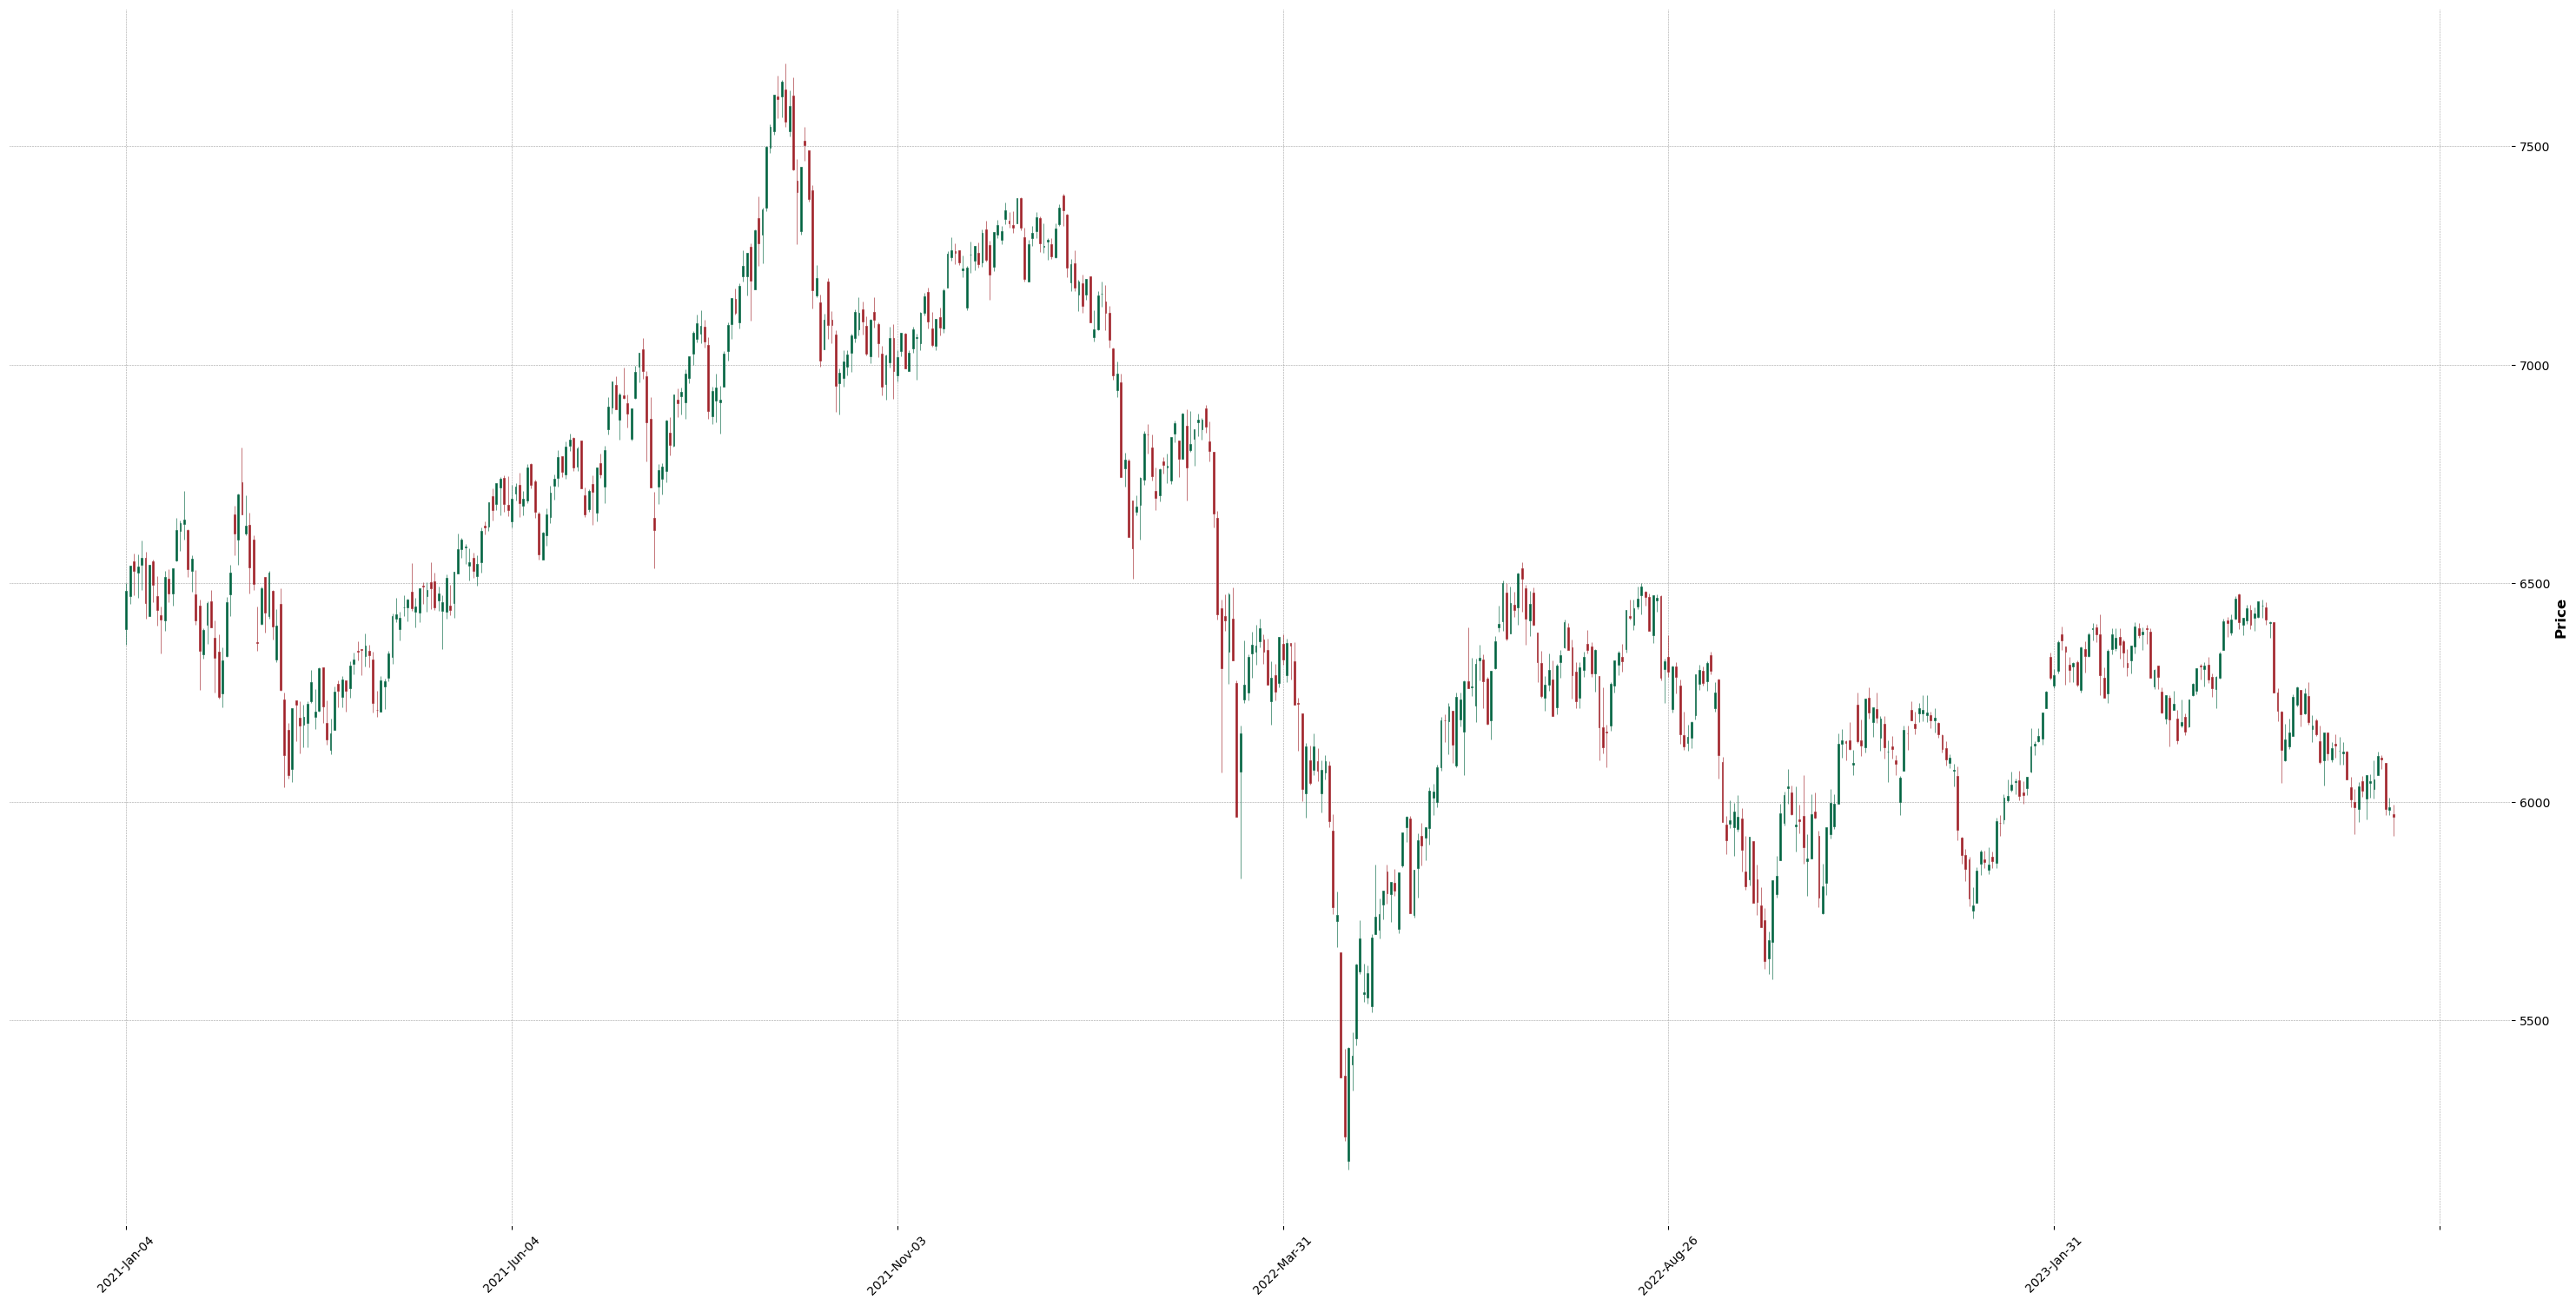

In [225]:
mpf.plot(kline_data, type='candle', style = "charles", figsize = (40,20))
plt.show()

In [226]:
results = []
for date in data.index:
    max_value = data.loc["2021-01-01":date,"close"].max()
    current = data.loc[date,"close"]
    results.append((max_value-current)/max_value)
data["retrace"] = results

In [227]:
values = pd.DataFrame(data.groupby("date")["close"].sum())
values["close"] = values["close"].apply(lambda x: (x / values['close'].iloc[0]) - 1)

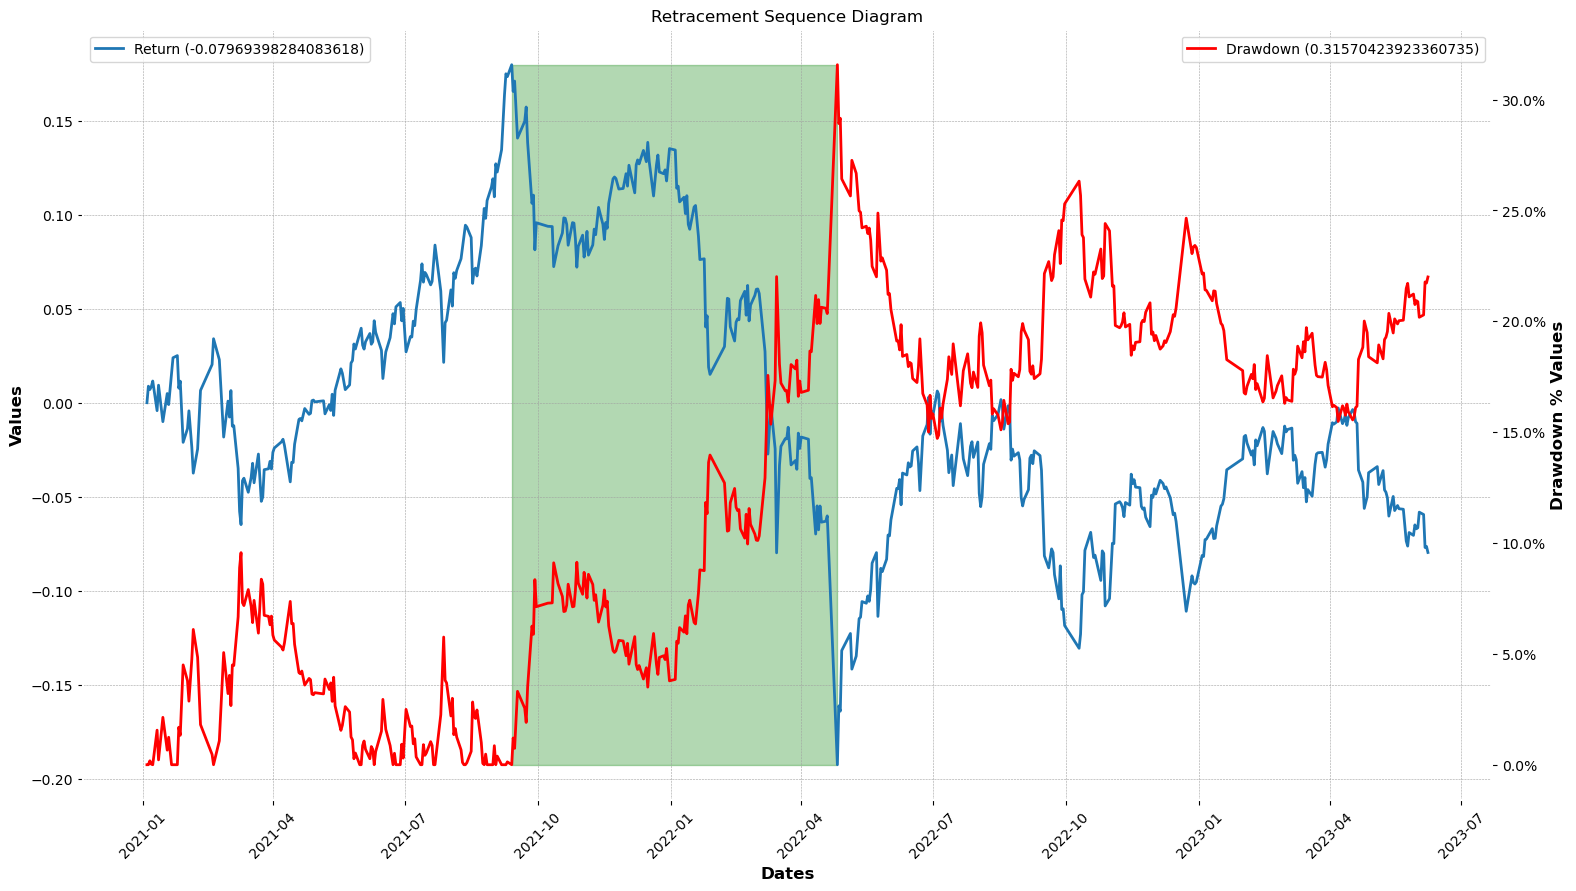

In [241]:
plt.figure(figsize=(40,10))
ax=plt.subplot(121)

last = values.iloc[-1].values[0]

ax.plot(values.index, values["close"],label = f"Return ({last})")
ax.set_title("Retracement Sequence Diagram")
ax.set_xlabel('Dates')
ax.set_ylabel('Values')
ax.set_xticklabels(values.index, rotation=45)

high = data["retrace"].max()

ax2 = ax.twinx()
ax2.plot(data.index, data["retrace"],color = "red", label = f"Drawdown ({high})")
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
ax2.set_ylabel('Drawdown % Values')
ax2.grid(visible = False)
ax.legend(loc = "upper left")



start = values[values["close"] == values["close"].max()].index.tolist()[0]
end = values[values["close"] == values.loc[start:date,"close"].min()].index.tolist()[0]
width = end-start

min_val = values["close"].min()
diff = values["close"].max() - min_val

rect = Rectangle((start, min_val), width, diff, color='green', alpha = 0.3, label = "Largest Retracement Value")
ax.add_patch(rect)
ax2.legend()

